Problem Statement: You are a cab rental start-up company. You have successfully run the pilot project and
now want to launch your cab service across the country. You have collected the
historical data from your pilot project and now have a requirement to apply analytics for
fare prediction. You need to design a system that predicts the fare amount for a cab ride
in the city.

In [53]:
##Need to install the following libraries.
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to
import matplotlib.pyplot as plt #data viz.
import seaborn as sb #data viz.
from sklearn.ensemble import GradientBoostingRegressor #ML algorithm
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [54]:
#Setting working directory
os.chdir("C:/Users/PRASHANT/Desktop/car fare prediction project/prashant/data")
print(os.getcwd())

C:\Users\PRASHANT\Desktop\car fare prediction project\prashant\data


    Data exploration and cleaning

In [55]:
#upload train data
train_df =  pd.read_csv('train_cab.csv')
train_df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [56]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [57]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000
mean,15.040780,-72.462695,39.914672,-72.462233,39.897853,2.625171
std,430.473414,10.578707,6.826797,10.575384,6.187276,60.846021
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734924,-73.991182,40.734647,1.000000
50%,8.500000,-73.981700,40.752603,-73.980170,40.753571,1.000000
75%,12.500000,-73.966842,40.767377,-73.963642,40.768015,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [58]:
##Here we can see that pickup_datetime variable is in object so need to change its data type to datetime
##change the data type as requried
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], errors= 'coerce')
train_df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [59]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train_df['year'] = train_df['pickup_datetime'].dt.year
train_df['Month'] = train_df['pickup_datetime'].dt.month
train_df['Date'] = train_df['pickup_datetime'].dt.day
train_df['Day of Week'] = train_df['pickup_datetime'].dt.dayofweek
train_df['Hour'] = train_df['pickup_datetime'].dt.hour
train_df['Minute'] = train_df['pickup_datetime'].dt.minute

In [60]:
##new created variables and their types
train_df.dtypes


fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
year                             float64
Month                            float64
Date                             float64
Day of Week                      float64
Hour                             float64
Minute                           float64
dtype: object

Some data cleaning is requried before moving further
1. As we know we have some negetive values in fare_amount
2. Passenger count would be max 6 if it is a SUV vehicle not more than that.
2. Also there are some values which are actually very high (top 3 values)
3. Latitudes range from -90 to 90. Longitudes range from -180 to 180

In [61]:
##finding decending order of fare to get to know whether the outliers are presented or not
train_df['fare_amount'].sort_values(ascending=False)

1014     54343.00
1071      4343.00
606        453.00
979        434.00
1122       430.00
1334       180.00
1482       165.00
6629       128.83
14141      108.00
12348      104.67
12914       96.00
7809        95.00
9430        88.00
10076       87.30
12613       87.00
4619        85.50
14518       82.50
12436       80.75
2638        79.00
4012        77.70
13961       77.15
2012        77.00
6667        76.80
8362        76.00
10523       75.80
11018       75.33
13614       75.00
15022       73.30
1493        70.00
4117        69.70
           ...   
1426         1.14
2779         0.01
10001        0.00
2485        -2.50
2038        -2.90
13031       -3.00
7             NaN
25            NaN
68            NaN
125           NaN
167           NaN
239           NaN
304           NaN
349           NaN
412           NaN
454           NaN
497           NaN
666           NaN
702           NaN
745           NaN
835           NaN
839           NaN
912           NaN
1573          NaN
1627      

In [62]:
train_df.shape

(16066, 13)

In [63]:
# remove negative values from fare amount

from collections import Counter
Counter(train_df['fare_amount']<0)

Counter({False: 16063, True: 3})

In [64]:
train_df = train_df.drop(train_df[train_df['fare_amount']<0].index, axis=0)
train_df.shape

(16063, 13)

In [65]:
##make sure there is no negative values in the fare_amount variable column
train_df['fare_amount'].min()

0.0

In [66]:
#also remove the row where fare amount is zero
train_df = train_df.drop(train_df[train_df['fare_amount']<1].index, axis=0)
train_df.shape

(16061, 13)

In [67]:
##here we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
## so we will remove the rows having fare amounting more that 454

train_df = train_df.drop(train_df[train_df['fare_amount']> 454 ].index, axis=0)
train_df.shape

(16059, 13)


Next check the passenger_count variable

In [68]:

train_df['passenger_count'].describe()

##here we can see that max number of passengers are showing as 5345 which is actually not possible. so removing rows having 
##the passengers more than 6

count    16004.000000
mean         2.625695
std         60.859318
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [69]:
## even if we consider a SUV car the max capacity is 6 + 1 driver.
train_df = train_df.drop(train_df[train_df['passenger_count']> 6 ].index, axis=0)
train_df.shape

(16039, 13)

In [70]:
##we should also remove the values of passenger count as 0.
train_df = train_df.drop(train_df[train_df['passenger_count'] == 0 ].index, axis=0)
train_df.shape

(15982, 13)

In [71]:
## recheck
train_df['passenger_count'].describe()

count    15927.000000
mean         1.649678
std          1.266022
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [72]:
train_df['passenger_count'].sort_values(ascending= True)

8861     0.12
0        1.00
9789     1.00
9790     1.00
9791     1.00
9792     1.00
9793     1.00
9794     1.00
9795     1.00
9796     1.00
9797     1.00
9800     1.00
9803     1.00
9805     1.00
9806     1.00
9807     1.00
9808     1.00
9810     1.00
9811     1.00
9813     1.00
9817     1.00
9818     1.00
9788     1.00
9787     1.00
9784     1.00
9783     1.00
9753     1.00
9755     1.00
9756     1.00
9757     1.00
         ... 
733       NaN
772       NaN
787       NaN
841       NaN
898       NaN
940       NaN
1360      NaN
1398      NaN
1399      NaN
1458      NaN
1747      NaN
1789      NaN
1850      NaN
1920      NaN
1983      NaN
1986      NaN
2103      NaN
2229      NaN
2377      NaN
7786      NaN
7804      NaN
7846      NaN
7891      NaN
7936      NaN
8006      NaN
8075      NaN
8138      NaN
8258      NaN
8305      NaN
16065     NaN
Name: passenger_count, Length: 15982, dtype: float64

In [73]:
#there is one value is passenger count as 0.12  we will aslo remove that row
train_df = train_df.drop(train_df[train_df['passenger_count'] == 0.12 ].index, axis=0)
train_df.shape

(15981, 13)

In [74]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute
count,15958.000000,15981.000000,15981.000000,15981.000000,15981.000000,15926.000000,15980.000000,15980.000000,15980.000000,15980.000000,15980.000000,15980.000000
mean,11.399561,-72.473173,39.920453,-72.463458,39.898440,1.649774,2011.732290,6.263204,15.668961,3.032916,13.493492,29.652315
std,11.303631,10.544110,6.815477,10.571878,6.187329,1.266004,1.866948,3.447014,8.685177,1.968980,6.521078,17.297807
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992157,40.734945,-73.991181,40.734716,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981698,40.752640,-73.980165,40.753587,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966835,40.767404,-73.963642,40.768032,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


#Next, let us explore the pickup latitude and longitudes

In [75]:
### we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#We need to drop these outliers
train_df = train_df.drop(((train_df[train_df['pickup_latitude']<-90])|(train_df[train_df['pickup_latitude']>90])).index, axis=0)
train_df.shape

(15980, 13)

In [76]:
### we need to drop the rows having  pickup lattitute and longitute out the range mentioned above
train_df = train_df.drop(((train_df[train_df['pickup_longitude']<-180])|(train_df[train_df['pickup_longitude']>180])).index, axis=0)
train_df.shape

(15980, 13)

In [77]:
#similar operation for dropoff latitude and longitude
train_df = train_df.drop(((train_df[train_df['dropoff_latitude']<-90])|(train_df[train_df['dropoff_latitude']>90])).index, axis=0)
train_df.shape

(15980, 13)

In [78]:
train_df = train_df.drop(((train_df[train_df['dropoff_longitude']<-180])|(train_df[train_df['dropoff_longitude']>180])).index, axis=0)
train_df.shape

(15980, 13)

In [79]:
train_df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


Treatment of missing values

In [80]:
train_df.isnull().sum()

fare_amount          23
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  1
Month                 1
Date                  1
Day of Week           1
Hour                  1
Minute                1
dtype: int64

In [81]:
###As missing values are less so its is better to remove the rows having missing values


# eliminating rows for which value of "fare_amount" is missing
train_df = train_df.drop(train_df[train_df['fare_amount'].isnull()].index, axis=0)
print(train_df.shape)
print(train_df['fare_amount'].isnull().sum())

(15957, 13)
0


In [82]:
#removing passanger_count missing values rows
train_df = train_df.drop(train_df[train_df['passenger_count'].isnull()].index, axis=0)
print(train_df.shape)
print(train_df['passenger_count'].isnull().sum())

(15902, 13)
0


In [83]:
#removing year missing values rows
train_df = train_df.drop(train_df[train_df['year'].isnull()].index, axis=0)
print(train_df.shape)

(15901, 13)


In [84]:
###No missing values left now
train_df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
Minute               0
dtype: int64

As we know that we have given pickup longitute and latitude values and same for drop. So we need to calculate the distance
Using the haversine formula and we will create a new variable called distance


In [85]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [86]:
train_df['distance']=train_df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [87]:
train_df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,3.0,9.0,50.0,3.787239
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012.0,11.0,20.0,1.0,20.0,35.0,1.555807
8,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009.0,9.0,2.0,2.0,1.0,11.0,2.849627
9,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1.0,2012.0,4.0,8.0,6.0,7.0,30.0,1.374577
10,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3.0,2012.0,12.0,24.0,0.0,11.0,24.0,0.000000


As we know that we have splitted the pickup date time variable into different varaibles like month, year, day etc
so now we dont need to have that pickup_Date variable now so we can drop that
Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.


In [88]:
    drop_it = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
    train_df = train_df.drop(drop_it, axis = 1)

In [89]:
train_df.head(10)

,fare_amount,passenger_count,year,Month,Date,Day of Week,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157
5,12.1,1.0,2011.0,1.0,6.0,3.0,9.0,3.787239
6,7.5,1.0,2012.0,11.0,20.0,1.0,20.0,1.555807
8,8.9,2.0,2009.0,9.0,2.0,2.0,1.0,2.849627
9,5.3,1.0,2012.0,4.0,8.0,6.0,7.0,1.374577
10,5.5,3.0,2012.0,12.0,24.0,0.0,11.0,0.000000


In [90]:
train_df.nunique()

fare_amount          460
passenger_count        7
year                   7
Month                 12
Date                  31
Day of Week            7
Hour                  24
distance           15448
dtype: int64

In [91]:

##finding decending order of fare to get to know whether the outliers are presented or not
train_df['distance'].sort_values(ascending=False)

9146     8667.542104
8646     8667.497512
2396     8667.454421
471      8667.304968
11652    8666.701504
13339    8666.613646
10214    8666.584706
4596     8666.566030
10457    8665.976222
10671    8665.702390
10487    8665.555634
1259     8665.268588
4277     8665.223767
6187     8664.191488
12982    8664.131808
6301     8663.039123
12704    8661.362152
14196    8657.136619
15782    8656.714168
15748    6028.926779
2279     6026.494216
5863     5420.988959
7013     4447.086698
10709     129.950482
14535     129.560455
11618     127.509261
12227     123.561157
5662      101.094619
1683       99.771579
3074       97.985088
            ...     
6426        0.000000
567         0.000000
13044       0.000000
1822        0.000000
3193        0.000000
12275       0.000000
11217       0.000000
13856       0.000000
2345        0.000000
12411       0.000000
9176        0.000000
1680        0.000000
8542        0.000000
4739        0.000000
7538        0.000000
14207       0.000000
15392       0

As we can see that top 26 values in the distance variables are very high It means more than 8000 Kms distance they have travelled
Also just after 26th value from the top, the distance goes down to 127, which means these values are showing some outliers
We need to remove these values


In [92]:
Counter(train_df['distance'] == 0)

Counter({False: 15447, True: 454})

In [93]:
Counter(train_df['fare_amount'] == 0)

Counter({False: 15901})

In [94]:
###we will remove the rows whose distance value is zero

train_df = train_df.drop(train_df[train_df['distance']== 0].index, axis=0)
train_df.shape

(15447, 8)

In [95]:
#we will remove the rows whose distance values is very high which is more than 129kms
train_df = train_df.drop(train_df[train_df['distance'] > 130 ].index, axis=0)
train_df.shape

(15424, 8)

In [96]:
train_df.describe()

,fare_amount,passenger_count,year,Month,Date,Day of Week,Hour,distance
count,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000
mean,11.398012,1.651926,2011.737487,6.274442,15.672783,3.035724,13.500259,3.442582
std,11.193878,1.267650,1.870648,3.447697,8.683994,1.969740,6.510108,4.597271
min,1.140000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000111
25%,6.000000,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.277861
50%,8.500000,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.190922
75%,12.500000,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.934646
max,453.000000,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,129.950482


In [97]:
cont = ['fare_amount', 'distance']
cat = ['year', 'Month', 'Date', 'Day of Week', 'Hour', 'passenger_count']

In [98]:
train_df.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day of Week        float64
Hour               float64
distance           float64
dtype: object

In [99]:
convert_obj = ['year', 'Month', 'Date', 'Day of Week','Hour' , 'passenger_count']

for i in convert_obj:
    train_df.loc[:,i] = train_df.loc[:,i].astype('object')

In [100]:
train_df.dtypes

fare_amount        float64
passenger_count     object
year                object
Month               object
Date                object
Day of Week         object
Hour                object
distance           float64
dtype: object

In [101]:
train_df.nunique()

fare_amount          450
passenger_count        7
year                   7
Month                 12
Date                  31
Day of Week            7
Hour                  24
distance           15424
dtype: int64

# Visualizations

Visualization of following:
    1. Number of Passengers effects the the fare
    2. Pickup date and time effects the fare
    3. Day of the week does effects the fare

In [ ]:
##Number of Passengers and the fare

Text(0, 0.5, 'Fare')

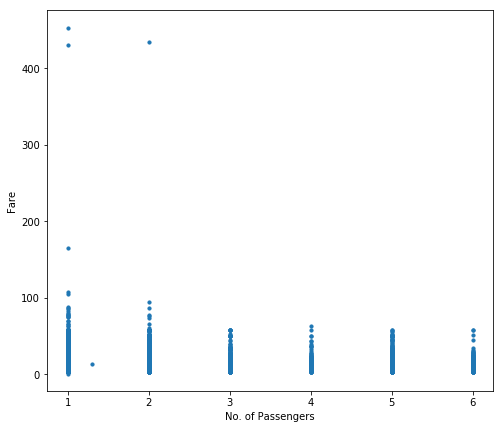

In [153]:
plt.figure(figsize=(8,7))
plt.scatter(x=train_df['passenger_count'], y=train_df['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

In [ ]:
### date -  time and fare

Text(0, 0.5, 'Fare')

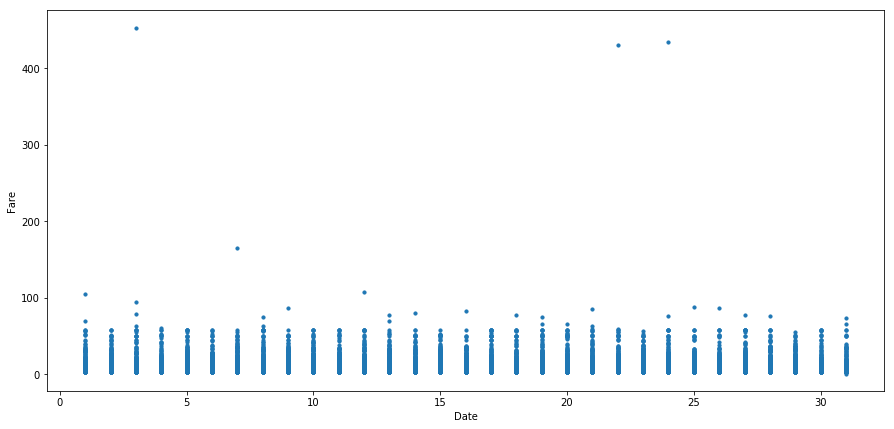

In [154]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Date'], y=train_df['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Hour'], y=train_df['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')

In [ ]:
### day of the week and fare

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(train_df['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

day of the week doesn't seem to have that much of an influence on the number of cab rides

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Day of Week'], y=train_df['fare_amount'], s=10)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

In [ ]:
### distance and Fare prices

It is quite obvious that distance will affect the fare prices. So we will not try to visualize the same.

In [ ]:
train_df.head()

# Featur Scaling

fare_amount


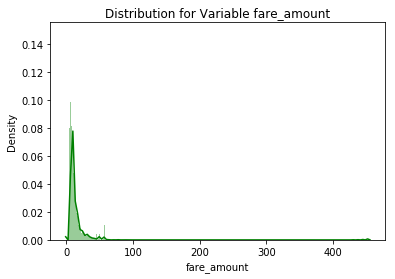

distance


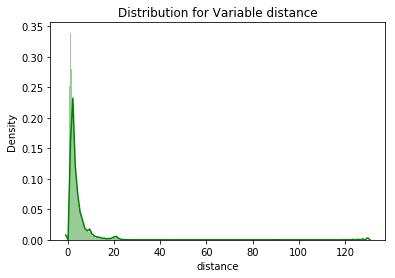

In [102]:
import seaborn as sns

#Normality check to check data is uniformly distributed or not-

for i in cont:
    print(i)
    sns.distplot(train_df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [103]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train_df['fare_amount'] = np.log1p(train_df['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train_df['distance'] = np.log1p(train_df['distance'])


fare_amount


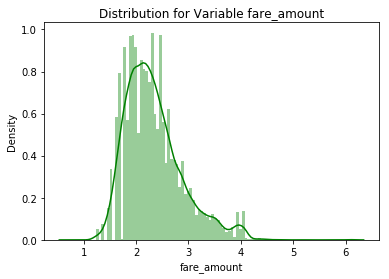

distance


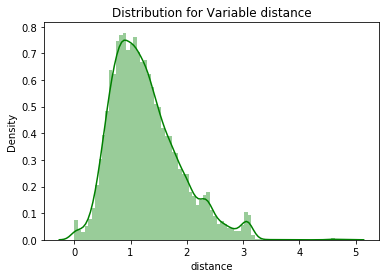

In [104]:
#Normality check to check data is uniformly distributed or not after log transformartion

for i in cont:
    print(i)
    sns.distplot(train_df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [ ]:
# Since our continous variables are now normally distributed, we will use not use any  Feature Scalling technique
# #Normalization or standardization


In [105]:
train_df.head(5)

,fare_amount,passenger_count,year,Month,Date,Day of Week,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


# Machine Learning algorithems

We need to split our train data into two parts

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [70]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train_df.iloc[:, train_df.columns != 'fare_amount'], 
                         train_df.iloc[:, 0], test_size = 0.20, random_state = 1)

In [71]:
print(X_train.shape)
print(X_test.shape)

(12339, 7)
(3085, 7)


1. Linear Regeression Model

In [72]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

In [73]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [74]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [75]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [76]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))


In [77]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))



Root Mean Squared Error For Training data = 0.27674235814452575
Root Mean Squared Error For Test data = 0.2503511796785927


In [78]:
from sklearn.metrics import r2_score
#calculate R^2 for train data
r2_score(y_train, pred_train_LR)

0.746855951097612

In [79]:
r2_score(y_test, pred_test_LR)

0.7778537029821875

2. Decision Tree Model

In [80]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [81]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [82]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [83]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.30120638747129796
Root Mean Squared Error For Test data = 0.28969521517125946


In [84]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.70012186420221

In [85]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7025442022580388

3. Random Forest Model

In [86]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

In [87]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [88]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [89]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [90]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09657314510376964
Root Mean Squared Error For Test data = 0.2391118443090677


In [91]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9691731465194205

In [92]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.7973521630451488

4. Gradient Boosting

In [93]:
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [95]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [96]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [97]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.22921680482502263
Root Mean Squared Error For Test data = 0.22925911886361813


In [98]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8137085033565772

In [99]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8263361773771449

# optimizing the results with some other parameters tuning

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [101]:
##Random Hyperparameter Grid

In [102]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [103]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.79.
RMSE =  0.2414849508921194


In [104]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [105]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.2550691086098142


In [106]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 12}
R-squared = 0.8.
RMSE =  0.2398346306918429


In [107]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  0.2417391489664249


# Prediction of fare of provided test data set

Before going further we need to perform all the preprocessing steps to our provided test data set which we have perfomed in the train data set above

In [108]:
test_df =  pd.read_csv('test.csv')
test_df.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [109]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [110]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], errors= 'coerce')
test_df.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [111]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test_df['year'] = test_df['pickup_datetime'].dt.year
test_df['Month'] = test_df['pickup_datetime'].dt.month
test_df['Date'] = test_df['pickup_datetime'].dt.day
test_df['Day of Week'] = test_df['pickup_datetime'].dt.dayofweek
test_df['Hour'] = test_df['pickup_datetime'].dt.hour
test_df['Minute'] = test_df['pickup_datetime'].dt.minute

In [112]:
##new created variables and their types
test_df.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
Month                              int64
Date                               int64
Day of Week                        int64
Hour                               int64
Minute                             int64
dtype: object

In [113]:
test_df['passenger_count'].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [114]:
test_df.shape

(9914, 12)

In [115]:
### we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#We need to drop these outliers
test_df = test_df.drop(((test_df[test_df['pickup_latitude']<-90])|(test_df[test_df['pickup_latitude']>90])).index, axis=0)
test_df.shape



(9914, 12)

In [116]:
### we need to drop the rows having  pickup lattitute and longitute out the range mentioned above
test_df = test_df.drop(((test_df[test_df['pickup_longitude']<-180])|(test_df[test_df['pickup_longitude']>180])).index, axis=0)
test_df.shape

(9914, 12)

In [117]:
#similar operation for dropoff latitude and longitude

test_df = test_df.drop(((test_df[test_df['dropoff_latitude']<-90])|(test_df[test_df['dropoff_latitude']>90])).index, axis=0)
test_df.shape


(9914, 12)

In [118]:
test_df = test_df.drop(((test_df[test_df['dropoff_longitude']<-180])|(test_df[test_df['dropoff_longitude']>180])).index, axis=0)
test_df.shape

(9914, 12)

In [119]:
##check for missing values

test_df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
Minute               0
dtype: int64

In [120]:
test_df['distance']=test_df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

test_df.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute,distance
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301
5,2012-12-01 21:12:12+00:00,-73.960983,40.765547,-73.979177,40.740053,1,2012,12,1,5,21,12,3.222549
6,2011-10-06 12:10:20+00:00,-73.949013,40.773204,-73.959622,40.770893,1,2011,10,6,3,12,10,0.929601
7,2011-10-06 12:10:20+00:00,-73.777282,40.646636,-73.985083,40.759368,1,2011,10,6,3,12,10,21.540102
8,2011-10-06 12:10:20+00:00,-74.014099,40.709638,-73.995106,40.741365,1,2011,10,6,3,12,10,3.873962
9,2014-02-18 15:22:20+00:00,-73.969582,40.765519,-73.980686,40.770725,1,2014,2,18,1,15,22,1.099794


In [121]:
drop_it = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test_df = test_df.drop(drop_it, axis = 1)

In [122]:
test_df.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day of Week          int64
Hour                 int64
distance           float64
dtype: object

In [123]:
test_df['distance'].sort_values(ascending=False)


4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
3569    27.863332
5115    27.653128
9391    27.287881
4864    27.169511
706     25.565980
2487    25.364627
5865    23.443658
5357    23.120250
5905    23.099448
2175    23.051119
8173    22.640229
7787    22.474632
2718    22.407984
248     22.344419
5373    22.132067
8825    22.113966
7346    22.080922
6260    22.064573
628     21.880433
5523    21.880030
7000    21.845869
8876    21.811484
8944    21.785143
7857    21.782684
4018    21.738063
          ...    
121      0.000000
2641     0.000000
1218     0.000000
1429     0.000000
7839     0.000000
451      0.000000
981      0.000000
2675     0.000000
1409     0.000000
7874     0.000000
6954     0.000000
976      0.000000
2618     0.000000
498      0.000000
5443     0.000000
8426     0.000000
8424     0.000000
491      0.000000
318      0.000000
1189     0.000000
2247     0.000000
2936     0.000000
6157     0.000000
9221     0.000000
860      0

In [124]:
test_df = test_df.drop(test_df[test_df['distance']== 0].index, axis=0)
test_df.shape

(9829, 7)

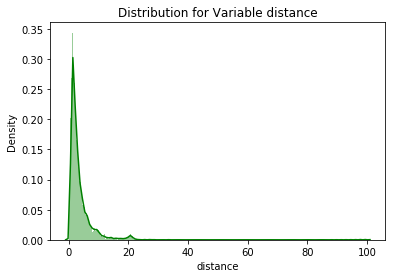

In [125]:
#Normality check to check data is uniformly distributed or not-

sns.distplot(test_df['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [126]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test_df['distance'] = np.log1p(test_df['distance'])

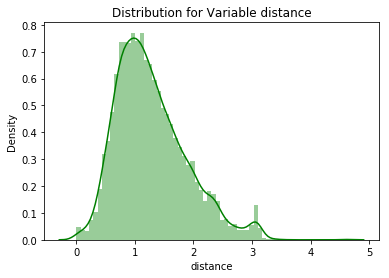

In [127]:
##recheck distribution for distance
sns.distplot(test_df['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [128]:
### predition using grid search CV for random forest model
  
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test_df)


In [129]:
predictions_GRF_test_Df

array([2.32142807, 2.33882446, 1.74346977, ..., 3.91763447, 3.21765585,
       2.00313204])

In [130]:
test_df['Predicted_fare'] = predictions_GRF_test_Df

In [131]:
test_df.head()

,passenger_count,year,Month,Date,Day of Week,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.321428
1,1,2015,1,27,1,13,1.231205,2.338824
2,1,2011,10,8,5,11,0.481579,1.743470
3,1,2012,12,1,5,21,1.085538,2.184233
4,1,2012,12,1,5,21,1.854312,2.776661


In [133]:
test_df.to_csv('test_df.csv')